Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

The 'population' variable is already set for you, but you will need to create the last three features.  Robbery and Murder are currently continuous variables.  For this model, please use these variables to create  categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0.  You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready.  Don't forget basic data cleaning procedures, either!  Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

In [53]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [70]:
df = pd.read_csv('copieddata.csv')
#rename columns to be programmer friendly
df.columns = ['city', 'population', 'violent_crime',
       'murder_and_nonnegligent_manslaughter',
       'rape_revised', 'rape_legacy',
       'robbery', 'agg_assault', 'property_crime', 'burglary',
       'larceny_theft', 'motor_vehicle_theft', 'arson']
df.head()

,city,population,violent_crime,murder_and_nonnegligent_manslaughter,rape_revised,rape_legacy,robbery,agg_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson
0,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


In [71]:
df.dtypes

city                                     object
population                               object
violent_crime                            object
murder_and_nonnegligent_manslaughter      int64
rape_revised                            float64
rape_legacy                              object
robbery                                  object
agg_assault                              object
property_crime                           object
burglary                                 object
larceny_theft                            object
motor_vehicle_theft                      object
arson                                   float64
dtype: object

In [72]:
#convert to appropriate types
df['population'] = df.population.str.replace(',', '').astype('int')
df['violent_crime'] = df.violent_crime.str.replace(',', '').astype('int')
df.drop(columns=['rape_revised'], inplace=True)
df['rape_legacy'] = df.rape_legacy.str.replace(',', '').astype('int')
df['robbery'] = df.robbery.str.replace(',', '').astype('int')
df['agg_assault'] = df.agg_assault.str.replace(',', '').astype('int')
df['property_crime'] = df.property_crime.str.replace(',', '').astype('int')
df['burglary'] = df.burglary.str.replace(',', '').astype('int')
df['larceny_theft'] = df.larceny_theft.str.replace(',', '').astype('int')
df['motor_vehicle_theft'] = df.motor_vehicle_theft.str.replace(',', '').astype('int')

In [73]:
df.dtypes

city                                     object
population                                int32
violent_crime                             int32
murder_and_nonnegligent_manslaughter      int64
rape_legacy                               int32
robbery                                   int32
agg_assault                               int32
property_crime                            int32
burglary                                  int32
larceny_theft                             int32
motor_vehicle_theft                       int32
arson                                   float64
dtype: object

In [74]:
df.shape

(348, 12)

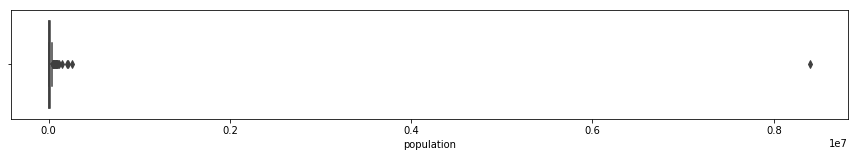

In [75]:
plt.figure(figsize=(15,2))
sns.boxplot(df['population'])
plt.show()

In [76]:
#that's no good. let's try this without New York, which is way too big to put into the same model as the rest of this data

In [86]:
dfny = df[df.city != 'New York']
dfny.shape

(347, 12)

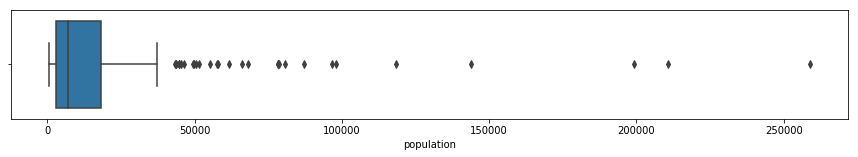

In [87]:
plt.figure(figsize=(15,2))
sns.boxplot(dfny['population'])
plt.show()

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


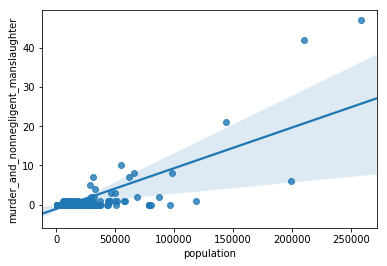

In [88]:
sns.regplot(x=dfny.population, y=dfny.murder_and_nonnegligent_manslaughter)

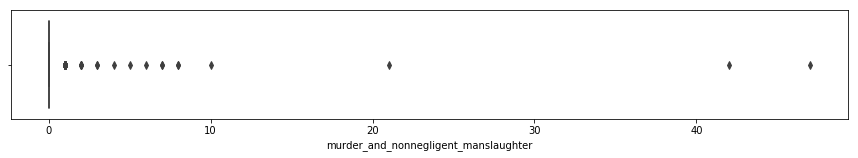

In [89]:
plt.figure(figsize=(15,2))
sns.boxplot(dfny['murder_and_nonnegligent_manslaughter'])
plt.show()

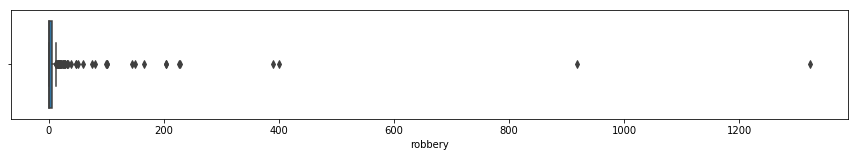

In [90]:
plt.figure(figsize=(15,2))
sns.boxplot(dfny['robbery'])
plt.show()

In [95]:
features = dfny[['city', 'population']]
features = features.assign(pop2 = features.population **2)

In [97]:
features = features.assign(murder = np.where(dfny['murder_and_nonnegligent_manslaughter'] >0,1,0))
features = features.assign(robbery = np.where(dfny['robbery'] >0, 1,0))
features

,city,population,pop2,murder,robbery
0,Adams Village,1861,3463321,0,0
1,Addison Town and Village,2577,6640929,0,0
2,Akron Village,2846,8099716,0,0
3,Albany,97956,1005443344,1,1
4,Albion Village,6388,40806544,0,1
5,Alfred Village,4089,16719921,0,1
6,Allegany Village,1781,3171961,0,0
7,Amherst Town,118296,1109041728,1,1
8,Amityville Village,9519,90611361,0,1
9,Amsterdam,18182,330585124,0,1
